<a href="https://colab.research.google.com/github/aliceteles-dev/PretaLab/blob/main/C%C3%B3pia_de_Projeto_Final_Ciclo_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final — Análise Exploratória de Músicas do Spotify

## Objetivo

Neste projeto, você aplicará todo o conhecimento adquirido sobre:

* Manipulação de dados com Pandas e NumPy

* Estatística descritiva e inferencial com Python

* Visualização de dados e storytelling com Matplotlib e Seaborn

O objetivo é realizar uma análise exploratória completa sobre o comportamento das músicas no Spotify, buscando responder perguntas de negócio ou de comportamento musical.

Dataset Spotify: https://drive.google.com/file/d/1G1TKSidyKCrPfLMike1ECPRG4JiBEvEr/view?usp=sharing

## Etapas do Projeto

### 1. Importação e exploração inicial (até 1 ponto)

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("spotify_dataset.csv")

### 1.1 Inspeção Básica

Requisito mínimo: verificação de colunas.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [167]:
df.describe()

,index,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [168]:
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [169]:
#descrevendo os tipos de dados
df.dtypes

,0
index,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


Sugestões:

* Verifique as colunas disponíveis (df.info() e df.describe()).

* Descreva brevemente quais tipos de dados o dataset contém (numéricos, categóricos, booleanos).

### 2. Limpeza e preparação de dados (até 2 pontos)

Requisito mínimo: verificar valores ausentes e duplicados.

In [170]:
#verificando valores ausentes
df.isnull().sum()

,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [171]:
#visualizando os valores ausentes
df[df.isnull().any(axis=1)]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [172]:
#verificando valores duplicados
df[df.duplicated()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


interpretação: não tem nenhuma linha de dados duplicada, porque eu pedi pra exibir só os duplicados no comando anterior, e não tive retorno.

In [173]:
#convertendo a duração de milissegundos pra minutos
df['duration_min'] = df['duration_ms'] / (60000)
df['duration_min'].head()

,duration_min
0,3.844433
1,2.493500
2,3.513767
3,3.365550
4,3.314217


In [174]:
#papadronizando o nome dos gêneros:
df['track_genre'] = df['track_genre'].str.lower()
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Sugestões:

* Identifique e trate valores ausentes.

* Crie uma nova coluna duration_min convertendo duration_ms para minutos.

* Padronize o nome dos gêneros (track_genre) para minúsculas.

* Verifique e remova duplicatas, se existirem.

### 3. Análise descritiva (até 2,5 pontos)

Requisito mínimo: Responder pelo menos três perguntas com análises descritivas.

In [175]:
#media de duração das musicas
df['duration_min'].mean()

np.float64(3.8004858852339187)

In [176]:
#média de duração das músicas, mas agora agrupando por gênero
genre_duration = df.groupby('track_genre')['duration_min'].mean()
print(genre_duration.head(50))

track_genre
acoustic          3.581616
afrobeat          4.140213
alt-rock          3.924265
alternative       3.700270
ambient           3.950984
anime             3.503401
black-metal       5.185052
bluegrass         3.691612
blues             3.709914
brazil            4.570508
breakbeat         5.362704
british           3.691707
cantopop          3.820054
chicago-house     6.114231
children          2.316463
chill             2.816833
classical         3.884583
club              3.438287
comedy            3.757181
country           3.433317
dance             3.295948
dancehall         3.290917
death-metal       4.124878
deep-house        3.655743
detroit-techno    6.200207
disco             4.098381
disney            2.604289
drum-and-bass     4.646523
dub               3.860662
dubstep           3.780107
edm               3.218199
electro           3.232841
electronic        3.883555
emo               3.161506
folk              4.402404
forro             3.178497
french          

In [177]:
#top 20 gêneros mais populares, olhando a média de popularidade por gênero
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
genre_popularity.head(20)

,popularity
track_genre,
pop-film,59.283
k-pop,56.896
chill,53.651
sad,52.379
grunge,49.594
indian,49.539
anime,48.772
emo,48.128
sertanejo,47.866


In [178]:
#gêneros que têm, em média, mais músicas dançantes

danceable_genres = df.groupby('track_genre')['danceability'].mean().sort_values(ascending=True)
danceable_genres.head(15)




,danceability
track_genre,
sleep,0.167923
grindcore,0.271854
black-metal,0.296411
iranian,0.300686
opera,0.313563
new-age,0.348455
ambient,0.367867
death-metal,0.368411
classical,0.381923


Sugestões de perguntas orientadoras:

* Qual é a duração média das músicas?

* Quais gêneros são mais populares?

* Músicas explícitas são mais ou menos populares?

* Quais gêneros têm músicas mais “dançantes”?

### 4. Visualização de distribuições (até 2,5 pontos)

Requisito mínimo: Criar pelo menos três gráficos.

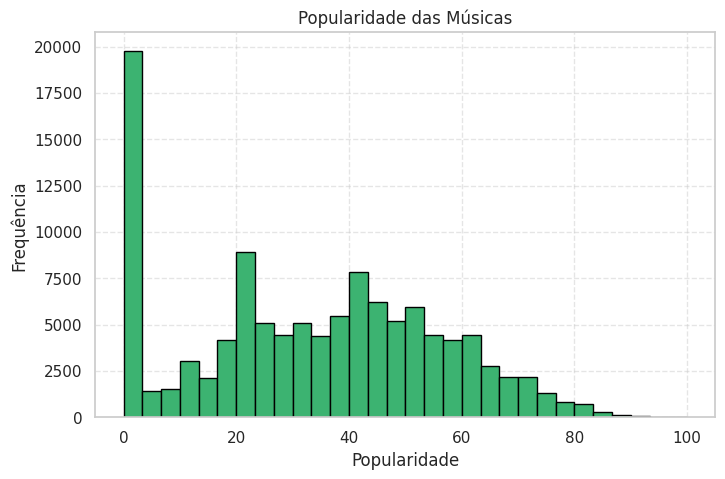

In [179]:
plt.figure(figsize=(8,5))
plt.hist(df['popularity'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-3238304431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


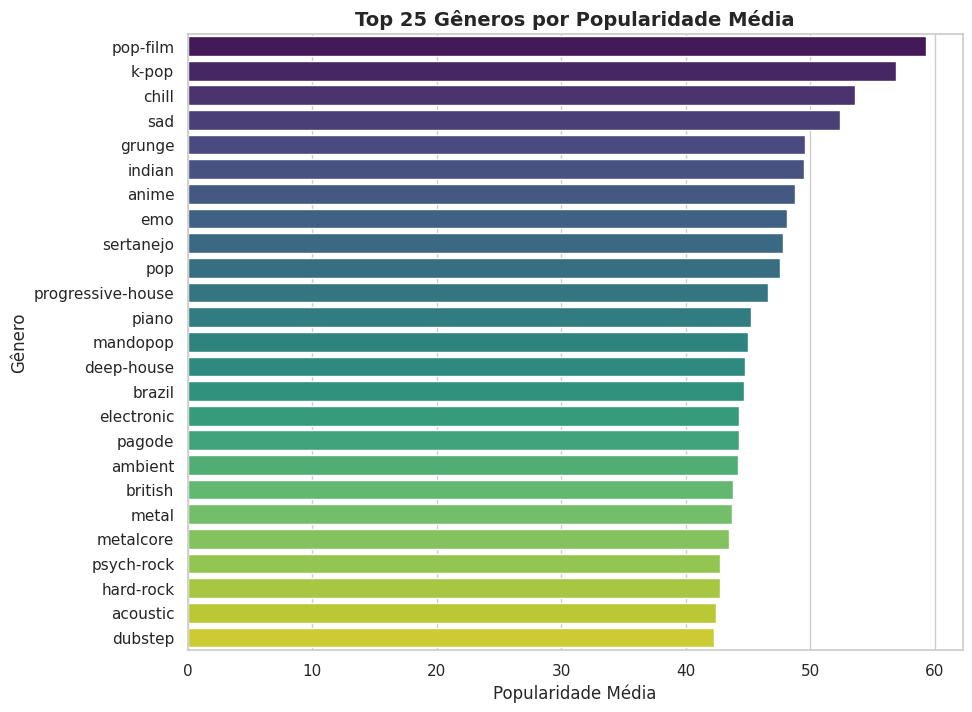

In [180]:
#não pude extrair tanta informação do grafico anterior então fiz esse pra mostrar a popularidade de acordo com o gênero

plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_mean.values[::-1],
    y=top_mean.index[::-1],
    palette="viridis"
)

plt.title("Top 25 Gêneros por Popularidade Média", fontsize=14, fontweight='bold')
plt.xlabel("Popularidade Média")
plt.ylabel("Gênero")

plt.show()

(0.0, 10.0)

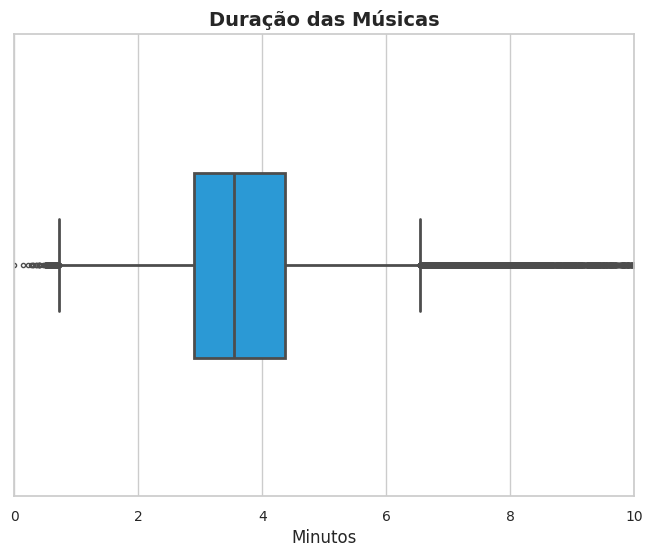

In [181]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(
    x=df['duration_min'],
    width=0.4,
    fliersize=3,
    linewidth=2,
    color="#0fa2f1",
)
plt.title("Duração das Músicas", fontsize=14, fontweight='bold')
plt.xlabel("Minutos", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 10)

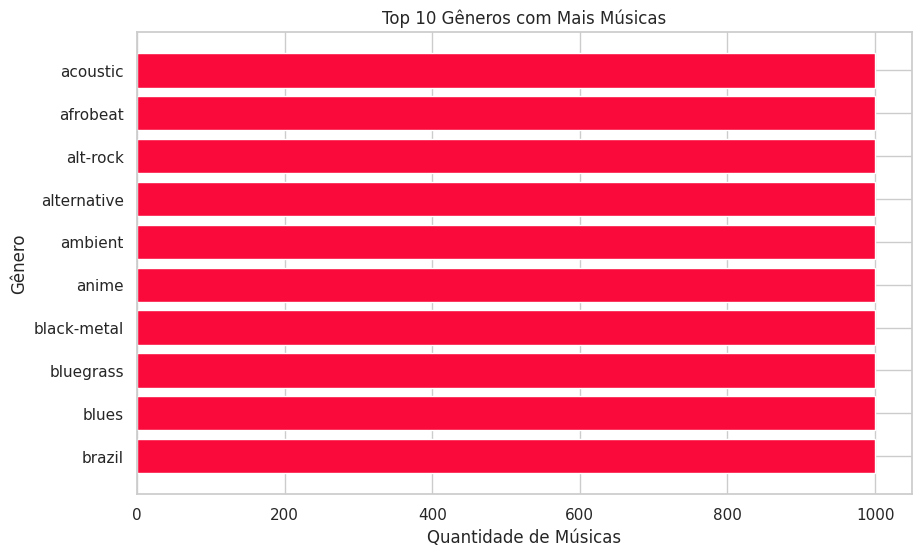

In [182]:
mais_musicas = df['track_genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(mais_musicas.index[::-1], mais_musicas.values[::-1], color="#fa0a3a")
plt.title('Top 10 Gêneros com Mais Músicas')
plt.xlabel('Quantidade de Músicas')
plt.ylabel('Gênero')
plt.show()

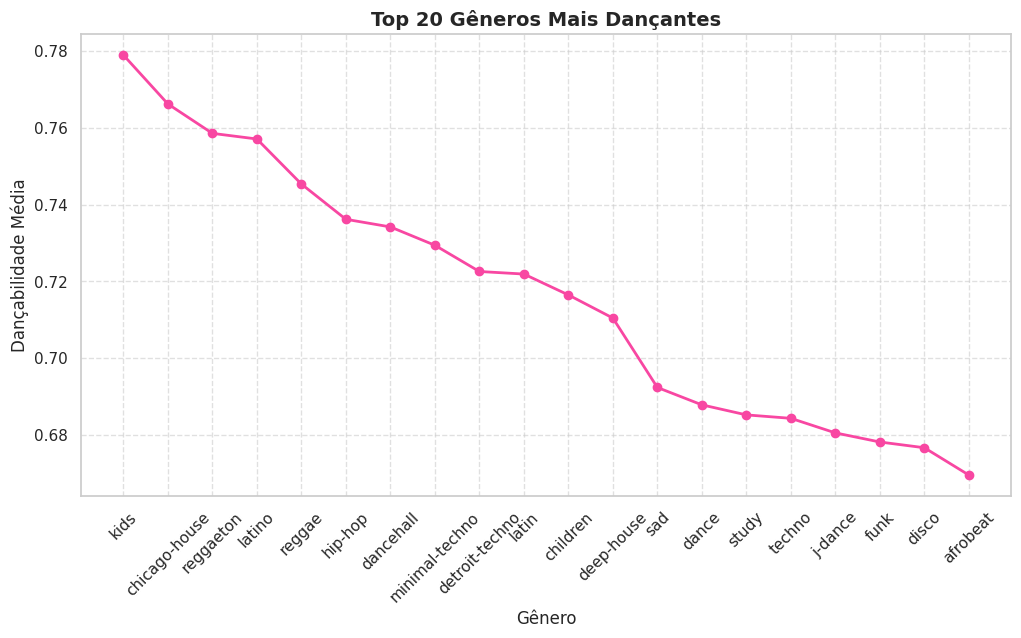

In [183]:
media_danceability = df.groupby('track_genre')['danceability'].mean().sort_values(ascending=False)
top20_genres = media_danceability.head(20).index
df_top20 = df[df['track_genre'].isin(top10_genres)]
media_top20 = df_top20.groupby('track_genre')['danceability'].mean().reindex(top20_genres)
plt.figure(figsize=(12,6))
plt.plot(media_top20.index, media_top20.values, marker='o', color='#f847a2', linewidth=2)
plt.title('Top 20 Gêneros Mais Dançantes', fontsize=14, weight='bold')
plt.xlabel('Gênero')
plt.ylabel('Dançabilidade Média')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Sugestões:

* Crie um histograma da variável popularity.

* Crie um boxplot da variável duration_min.

* Crie um gráfico de barras mostrando os 10 gêneros com mais músicas.

* Visualize a distribuição de danceability por gênero.

### 5. Desafio Extra (até 1,5 ponto)

Escolha **uma** tarefa extra para implementar.

#### Correlação e relações entre variáveis
1. Gere um heatmap de correlação das variáveis numéricas.

2. Explore como a dançabilidade se relaciona com a acousticness.

#### Visualizações avançadas e storytelling

1. Faça um gráfico que relacione energy, valence e popularity usando tamanho e cor.

2. Crie uma análise comparando gêneros musicais (ex: “pop” vs “rock”).

3. Identifique padrões de música que mais tendem a ser “hits”.

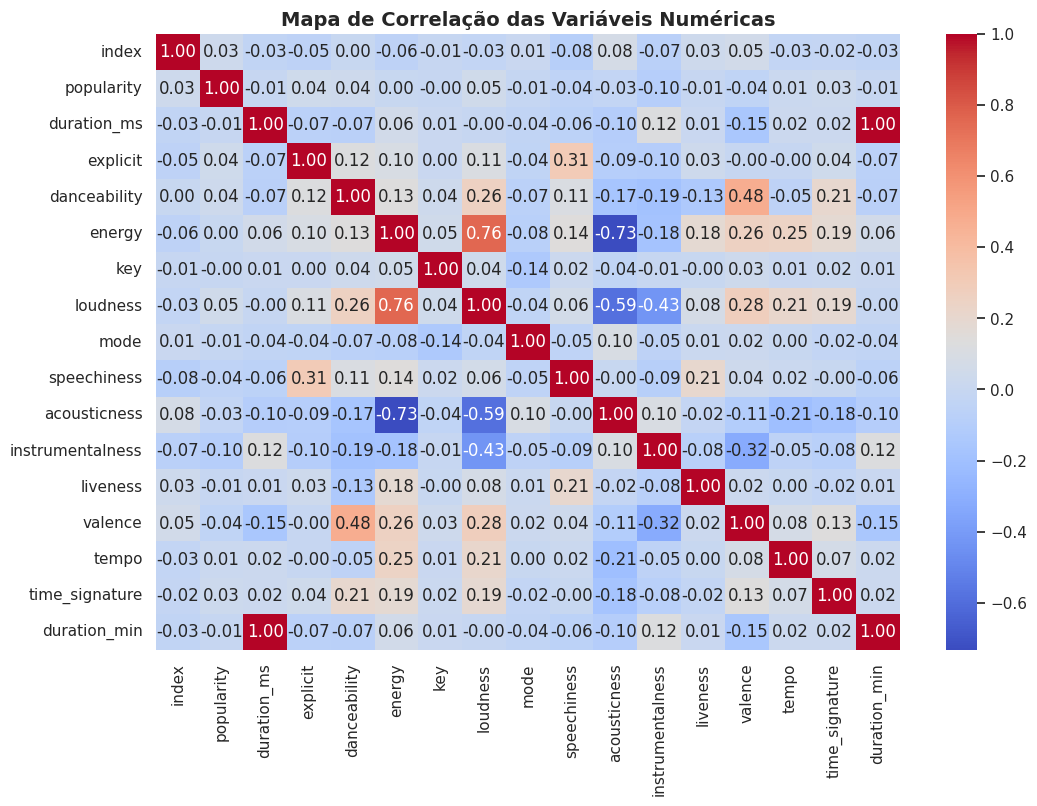

In [184]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação das Variáveis Numéricas", fontsize=14, weight='bold')
plt.show()

### 6. Conclusão e interpretação (até 2 pontos)

Responda, em texto, no final do notebook:

* Quais foram as principais descobertas?

* O que os dados revelam sobre o comportamento dos ouvintes no Spotify?

Principais descobertas: </br>

Ao analisar o heatmap, percebe-se que existem algumas correlações entre algumas variáveis que podem ser consideradas já esperadas, como por exemplo, uma energia ("energy") mais alta tende a estar positivamente relacionada com volume ("loudness"), enquanto a categoria acústica ("acousticness") já tem uma correlação negativa com a energia e a dançabilidade ("danceability"), ou seja, isso indica que as músicas que são mais dançantes e mais enérgicas, geralmente são eletrônicas, e não acústicas.
</br> </br>
A comparação entre a popularidade dos gêneros musicais permitiu observar que existe uma discrepância bem significativa entre os gêneros mais populares (que são realmente muito populares) e os menos populares, que já são extremamente nichados e pouco conhecidos; isso vai impactar no alcance das músicas lançadas na plataforma, ou seja, o gênero influencia muito se uma música vai ter um bom alcance ou não. Se o alcance no Spotify for uma métrica de valor como é, por exemplo, em plataformas como o Youtube ou o TikTok, isso também significa que um músico ou grupo musical que produza música de gêneros mais nichados provavelmente vai receber menos ao publicar sua música no Spotify, salvo exceções.

Comportamento dos ouvintes: </br>

Um dos gêneros mais procurados pelos usuários do Spotify é o k-pop, colocado em segundo lugar de acordo com a média de popularidade, e dentre os mais ouvidos também estão sertanejo, anime, pagode, eletrônica, entre outros; como geralmente uma única pessoa busca mais de um gênero para consumir, o gráfico dos 25 gêneros mais populares permite traçar um perfil médio do ouvinte.

